In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [32]:
# show head without truncation
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)


df = pd.read_csv("../data/oh_filtered_till_2020.csv")
df.head()

/var/folders/wy/50c5sv7n4wsfhhww_wwjz2tr0000gn/T/ipykernel_21930/2214652787.py:7: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/oh_filtered_till_2020.csv")


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,LALVOTERID,Residence_Addresses_CensusBlock,Residence_Families_FamilyID,Residence_Addresses_Property_Land_Square_Footage,Residence_Addresses_Property_Type,Mailing_Addresses_State,Mailing_Addresses_Zip,Voters_Gender,Voters_Age,Voters_BirthDate,ConsumerData_Education_of_Person,EthnicGroups_EthnicGroup1Desc,ConsumerData_Inferred_HH_Rank,ConsumerData_Language_Code,ConsumerData_Marital_Status,ConsumerData_Single_Parent,ConsumerDataLL_Veteran,ConsumerData_African_American_Professional,ConsumerData_Business_Owner,ConsumerData_Occupation_Group,ConsumerData_Occupation_of_Person,ConsumerData_LikelyRecentEmployment_Executive_Level,ConsumerData_LikelyRecentEmployment_Executive_Department,Voters_PlaceOfBirth,Voters_Active,Voters_CalculatedRegDate,Voters_OfficialRegDate,Parties_Description,VoterParties_Change_Changed_Party,ConsumerData_Religion_Code,ConsumerData_Number_Of_Adults_in_HH,ConsumerData_Number_Of_Children_in_HH,ConsumerData_Number_Of_Persons_in_HH,ConsumerData_Disabled_In_HH,ConsumerData_Generations_In_HH,ConsumerData_Presence_Of_Children_in_HH,ConsumerData_Senior_Adult_In_HH,ConsumerData_Veteran_In_HH,ConsumerData_Young_Adult_In_HH,ConsumerData_Assimilation_Status,Residence_HHParties_Description,Residence_Families_HHVotersCount,County,Voters_FIPS,ConsumerData_RUS_Code,Residence_Addresses_Density,ConsumerData_AreaPcntHHWithChildren,ConsumerData_AreaPcntHHMarriedCoupleWithChild,ConsumerData_AreaPcntHHMarriedCoupleNoChild,ConsumerData_AreaPcntHHSpanishSpeaking,FECDonors_NumberOfDonations,FECDonors_TotalDonationsAmount,FECDonors_TotalDonationsAmt_Range,ConsumerData_Home_Purchase_Year,ConsumerData_Home_Purchase_Date,ConsumerData_Home_Est_Current_Value_Code,ConsumerData_TaxAssessedValueTotal,ConsumerData_Home_Mortgage_Amount,ConsumerData_Home_Mortgage_Amount_Code,ConsumerData_Home_Purchase_Price,ConsumerData_Home_Purchase_Price_Code,ConsumerData_TaxMarketValueTotal,ConsumerData_Dwelling_Type,ConsumerData_AccessibilityHandicapFlag,Residence_Addresses_Property_Home_Square_Footage,ConsumerData_Homeowner_Probability_Model,ConsumerData_BedroomsCount,ConsumerData_RoomsCount,ConsumerData_CRA_Income_Classification_Code,ConsumerData_Credit_Rating,ConsumerData_Estimated_Income_Amount,ConsumerData_Household_Net_Worth,ConsumerData_AreaMedianHousingValue,ConsumerData_EstimatedAreaMedianHHIncome,ConsumerData_AreaMedianEducationYears,ConsumerData_Likely_Income_Ranking_by_Area,ConsumerData_Likely_Educational_Attainment_Ranking_by_Area,ConsumerData_Social_Ranking_Index_by_Area,ConsumerData_MAID_Available,General_2000_11_07,General_2004_11_02,General_2008_11_04,General_2012_11_06,General_2016_11_08,General_2020_11_03,can_vote_2000-11-07,can_vote_2004-11-02,can_vote_2008-11-04,can_vote_2012-11-06,can_vote_2016-11-08,can_vote_2020-11-03,vote_life,vote_eligible_from
0,0,0,0,LALOH483988945,2034.0,R021844817,13000.0,Apartment,MA,2119.0,M,27.0,1997-05-06,NaN,European,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,2016-02-14,2020-02-12,Democratic,NaN,NaN,1,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,Democratic,1,FAYETTE,47,Rural,6277.0,38%,38%,63%,0%,NaN,NaN,NaN,NaN,NaN,"$200,000 - $224,999",NaN,NaN,NaN,NaN,NaN,NaN,Multiple Family Dwelling Unit,NaN,700.0,Renter,NaN,NaN,NaN,NaN,$86944,NaN,$216300,$86944,13.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,Y,Y,False,False,False,False,True,True,1724,2015-05-06
1,1,1,1,LALOH539415345,3006.0,R015691344,14000.0,Apartment,MA,2135.0,M,24.0,2000-05-30,NaN,European,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,2020-09-21,2020-09-21,Non-Partisan,NaN,NaN,1,NaN,1,NaN,1,NaN,NaN,NaN,Y,NaN,Independent,1,CUYAHOGA,35,Suburban,1797.0,41%,37%,32%,0%,NaN,NaN,NaN,NaN,NaN,"$300,000 - $349,999",NaN,NaN,NaN,NaN,NaN,NaN,Multiple Family Dwelling Unit,NaN,6300.0,Renter,NaN,NaN,NaN,NaN,$130227,NaN,$335100,$130227,15.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,Y,False,False,False,False,False,True,43,2018-05-30
2,2,2,2,LALOH309002,1026.0,R000431800,56000.0,Residential,ME,3904.0,M,40.0,1984-04-04,NaN,European,2.0,English,Married,N

In [33]:
# drop columns that have Unnamed in their name
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [34]:
df.head()

,LALVOTERID,Residence_Addresses_CensusBlock,Residence_Families_FamilyID,Residence_Addresses_Property_Land_Square_Footage,Residence_Addresses_Property_Type,Mailing_Addresses_State,Mailing_Addresses_Zip,Voters_Gender,Voters_Age,Voters_BirthDate,ConsumerData_Education_of_Person,EthnicGroups_EthnicGroup1Desc,ConsumerData_Inferred_HH_Rank,ConsumerData_Language_Code,ConsumerData_Marital_Status,ConsumerData_Single_Parent,ConsumerDataLL_Veteran,ConsumerData_African_American_Professional,ConsumerData_Business_Owner,ConsumerData_Occupation_Group,ConsumerData_Occupation_of_Person,ConsumerData_LikelyRecentEmployment_Executive_Level,ConsumerData_LikelyRecentEmployment_Executive_Department,Voters_PlaceOfBirth,Voters_Active,Voters_CalculatedRegDate,Voters_OfficialRegDate,Parties_Description,VoterParties_Change_Changed_Party,ConsumerData_Religion_Code,ConsumerData_Number_Of_Adults_in_HH,ConsumerData_Number_Of_Children_in_HH,ConsumerData_Number_Of_Persons_in_HH,ConsumerData_Disabled_In_HH,ConsumerData_Generations_In_HH,ConsumerData_Presence_Of_Children_in_HH,ConsumerData_Senior_Adult_In_HH,ConsumerData_Veteran_In_HH,ConsumerData_Young_Adult_In_HH,ConsumerData_Assimilation_Status,Residence_HHParties_Description,Residence_Families_HHVotersCount,County,Voters_FIPS,ConsumerData_RUS_Code,Residence_Addresses_Density,ConsumerData_AreaPcntHHWithChildren,ConsumerData_AreaPcntHHMarriedCoupleWithChild,ConsumerData_AreaPcntHHMarriedCoupleNoChild,ConsumerData_AreaPcntHHSpanishSpeaking,FECDonors_NumberOfDonations,FECDonors_TotalDonationsAmount,FECDonors_TotalDonationsAmt_Range,ConsumerData_Home_Purchase_Year,ConsumerData_Home_Purchase_Date,ConsumerData_Home_Est_Current_Value_Code,ConsumerData_TaxAssessedValueTotal,ConsumerData_Home_Mortgage_Amount,ConsumerData_Home_Mortgage_Amount_Code,ConsumerData_Home_Purchase_Price,ConsumerData_Home_Purchase_Price_Code,ConsumerData_TaxMarketValueTotal,ConsumerData_Dwelling_Type,ConsumerData_AccessibilityHandicapFlag,Residence_Addresses_Property_Home_Square_Footage,ConsumerData_Homeowner_Probability_Model,ConsumerData_BedroomsCount,ConsumerData_RoomsCount,ConsumerData_CRA_Income_Classification_Code,ConsumerData_Credit_Rating,ConsumerData_Estimated_Income_Amount,ConsumerData_Household_Net_Worth,ConsumerData_AreaMedianHousingValue,ConsumerData_EstimatedAreaMedianHHIncome,ConsumerData_AreaMedianEducationYears,ConsumerData_Likely_Income_Ranking_by_Area,ConsumerData_Likely_Educational_Attainment_Ranking_by_Area,ConsumerData_Social_Ranking_Index_by_Area,ConsumerData_MAID_Available,General_2000_11_07,General_2004_11_02,General_2008_11_04,General_2012_11_06,General_2016_11_08,General_2020_11_03,can_vote_2000-11-07,can_vote_2004-11-02,can_vote_2008-11-04,can_vote_2012-11-06,can_vote_2016-11-08,can_vote_2020-11-03,vote_life,vote_eligible_from
0,LALOH483988945,2034.0,R021844817,13000.0,Apartment,MA,2119.0,M,27.0,1997-05-06,NaN,European,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,2016-02-14,2020-02-12,Democratic,NaN,NaN,1,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,Democratic,1,FAYETTE,47,Rural,6277.0,38%,38%,63%,0%,NaN,NaN,NaN,NaN,NaN,"$200,000 - $224,999",NaN,NaN,NaN,NaN,NaN,NaN,Multiple Family Dwelling Unit,NaN,700.0,Renter,NaN,NaN,NaN,NaN,$86944,NaN,$216300,$86944,13.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,Y,Y,False,False,False,False,True,True,1724,2015-05-06
1,LALOH539415345,3006.0,R015691344,14000.0,Apartment,MA,2135.0,M,24.0,2000-05-30,NaN,European,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I,2020-09-21,2020-09-21,Non-Partisan,NaN,NaN,1,NaN,1,NaN,1,NaN,NaN,NaN,Y,NaN,Independent,1,CUYAHOGA,35,Suburban,1797.0,41%,37%,32%,0%,NaN,NaN,NaN,NaN,NaN,"$300,000 - $349,999",NaN,NaN,NaN,NaN,NaN,NaN,Multiple Family Dwelling Unit,NaN,6300.0,Renter,NaN,NaN,NaN,NaN,$130227,NaN,$335100,$130227,15.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,Y,False,False,False,False,False,True,43,2018-05-30
2,LALOH309002,1026.0,R000431800,56000.0,Residential,ME,3904.0,M,40.0,1984-04-04,NaN,European,2.0,English,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,2002-04-07,2018-09

In [35]:
# preprocess the data to 
# we have 2000, 2004, 2008, 2012, 2016, 2020

# we will check people who voted for their first time for each election (2000, 2004, 2008, 2012, 2016, 2020)
# we will create map function

# first let us delete rows that have vote_eligble_from before 1996

# election in 1996 happened on 5th of November (1996-11-05)

print(df.shape)

df_filtered = df[df['vote_eligible_from'] > '1996-11-05'].copy()

print(df_filtered.shape)

(6781838, 93)
(2598809, 93)


In [36]:
# get columns with can_vote in their name
can_vote_columns = df_filtered.columns[df_filtered.columns.str.contains('can_vote')]

dates = [i.split('_')[2] for i in can_vote_columns]
print(dates)

['2000-11-07', '2004-11-02', '2008-11-04', '2012-11-06', '2016-11-08', '2020-11-03']


In [37]:
# Now assign the first time voters for each election
def assign_first_time_voters(row):
    if row['vote_eligible_from'] < '2000-11-07':
        return '2000-11-07'
    elif row['vote_eligible_from'] < '2004-11-02':
        return '2004-11-02'
    elif row['vote_eligible_from'] < '2008-11-04':
        return '2008-11-04'
    elif row['vote_eligible_from'] < '2012-11-06':
        return '2012-11-06'
    elif row['vote_eligible_from'] < '2016-11-08':
        return '2016-11-08'
    else:
        return '2020-11-03'

df_filtered['first_available_vote_date'] = df_filtered.apply(assign_first_time_voters, axis=1)

In [38]:
print(df_filtered['first_available_vote_date'].value_counts())
# count nan
print(df_filtered['first_available_vote_date'].isna().sum())

first_available_vote_date
2008-11-04    459564
2000-11-07    454802
2004-11-02    449097
2012-11-06    447455
2016-11-08    429881
2020-11-03    358010
Name: count, dtype: int64
0


In [39]:
# get the voted column 
voted_columns = df_filtered.columns[df_filtered.columns.str.contains('General_')]

print(voted_columns)

Index(['General_2000_11_07', 'General_2004_11_02', 'General_2008_11_04',
       'General_2012_11_06', 'General_2016_11_08', 'General_2020_11_03'],
      dtype='object')


In [40]:
# check if they did vote in the first year they were eligible to vote
def check_did_vote_for_first_opportunity(row):
    available_vote_year = row['first_available_vote_date']
    voted_column = 'General_' + available_vote_year.replace('-', '_')
    
    return row[voted_column]

df_filtered['did_vote_for_first_opportunity'] = df_filtered.apply(check_did_vote_for_first_opportunity, axis=1)

1263044 1335765


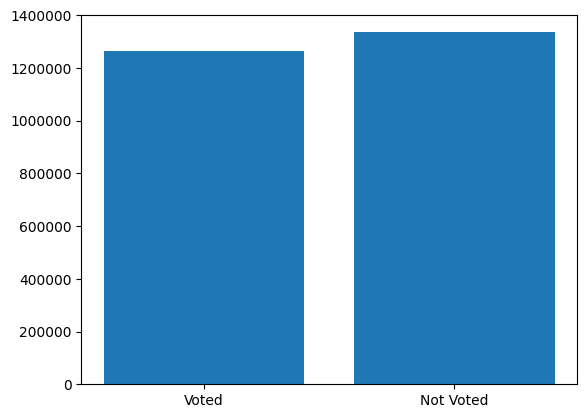

In [41]:
plt.ticklabel_format(style='plain', axis='both')  # 'both', 'x', or 'y' axis

# get who voted
voted_count = df_filtered[df_filtered['did_vote_for_first_opportunity'] == 'Y'].shape[0]
note_voted_count = df_filtered[df_filtered['did_vote_for_first_opportunity'] != 'Y'].shape[0]
print(voted_count, note_voted_count)
assert voted_count + note_voted_count == df_filtered.shape[0]

# plot the voted and not voted
plt.bar(['Voted', 'Not Voted'], [voted_count, note_voted_count])
plt.show()

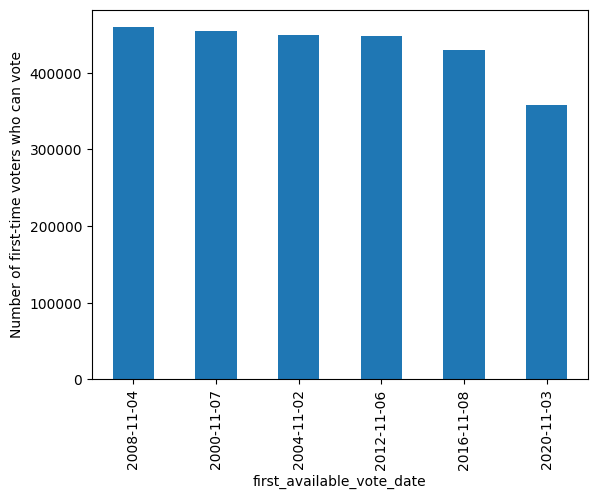

In [114]:
# the total number of people who could vote for each election group by year
total_voters = df_filtered['first_available_vote_date'].value_counts()

# plot it
total_voters.plot(kind='bar')
plt.ylabel('Number of first-time voters who can vote')
plt.show()


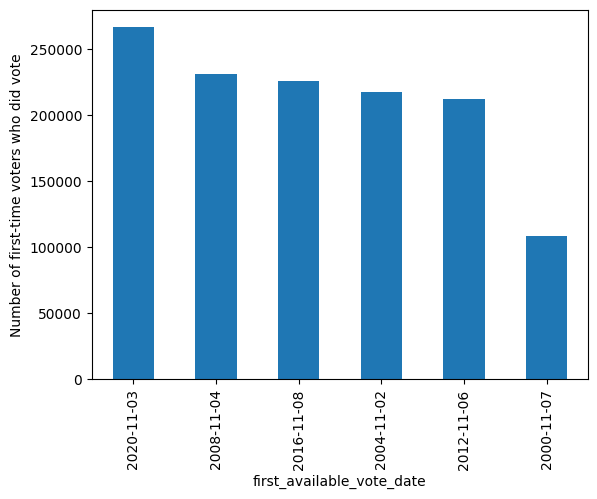

In [115]:
# Number of first-time voters who did vote
voted = df_filtered[df_filtered['did_vote_for_first_opportunity'] == 'Y']['first_available_vote_date'].value_counts()
plt.ticklabel_format(style='plain', axis='both')  # 'both', 'x', or 'y' axis
voted.plot(kind='bar')
plt.ylabel('Number of first-time voters who did vote')
plt.show()

first_available_vote_date
2000-11-07    23.932173
2004-11-02    48.530941
2008-11-04    50.280266
2012-11-06    47.485445
2016-11-08    52.538261
2020-11-03    74.537303
dtype: float64


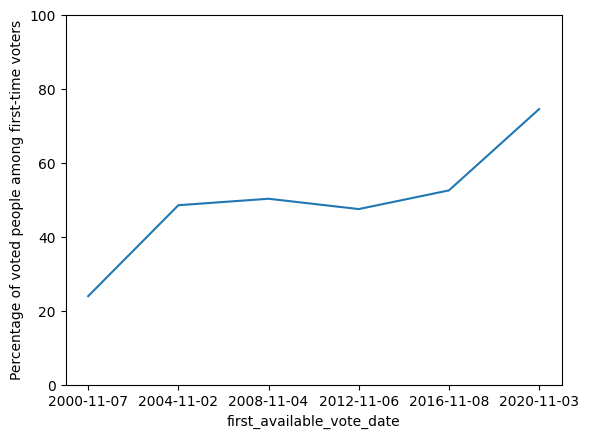

In [65]:
# group the people by their first available vote date
grouped = df_filtered.groupby('first_available_vote_date')['did_vote_for_first_opportunity'].value_counts().unstack()
# print(grouped)
# 
total_available_voters = df_filtered['first_available_vote_date'].value_counts()
# print(total_available_voters)

ratio = (grouped['Y'] / total_available_voters) * 100

print(ratio)

# plot the ratio of people who voted for the first time
ratio.plot(kind='line')
plt.ylim(0, 100)  # Set y-axis range from 0 to 100
plt.ylabel('Percentage of voted people among first-time voters')
plt.show()



# # check if the sum of the grouped is equal to the number of total voted people
# assert grouped.sum().sum() == voted_count

# # check the number of people who voted for each election
# grouped.plot(kind='bar', stacked=True)
# plt.show()

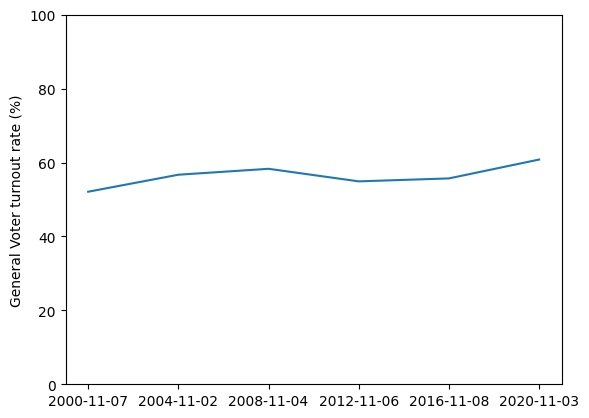

In [68]:
# get voter turnout rate ()
# https://www.presidency.ucsb.edu/statistics/data/voter-turnout-in-presidential-elections

# we will look at vap
{
    "2000-11-07": 52.1,
    "2004-11-02": 56.7,
    "2008-11-04": 58.3,
    "2012-11-06": 54.9,
    "2016-11-08": 55.7,
    "2020-11-03": 60.8
}

# plot the voter turnout rate
voter_turnout_rate = {
    "2000-11-07": 52.1,
    "2004-11-02": 56.7,
    "2008-11-04": 58.3,
    "2012-11-06": 54.9,
    "2016-11-08": 55.7,
    "2020-11-03": 60.8
}

voter_turnout_rate = pd.Series(voter_turnout_rate)

voter_turnout_rate.plot(kind='line')
plt.ylabel('General Voter turnout rate (%)')
plt.ylim(0, 100)
plt.show()


In [43]:
# get the values of the grouped
print([grouped.loc[i, 'Y'] for i in grouped.index])

first_time_voted_count = [grouped.loc[i, 'Y'] for i in grouped.index]

[np.int64(108844), np.int64(217951), np.int64(231070), np.int64(212476), np.int64(225852), np.int64(266851)]


4638114 5087174 5546751 5994194 6424017 6781630
[np.int64(108844), np.int64(217951), np.int64(231070), np.int64(212476), np.int64(225852), np.int64(266851)]
2.3467297267811875 4.284323673615253 4.1658621416393125 3.54469675155659 3.5157441208514855 3.9349094539218448


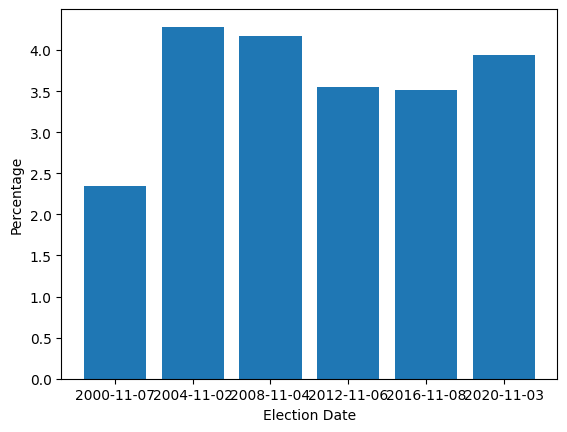

In [46]:
can_vote_columns = df_filtered.columns[df_filtered.columns.str.contains('can_vote')]

df[can_vote_columns].sum(axis=0)

# get the total eligible people that could vote for each election
available_2000 = df["can_vote_2000-11-07"].sum()
available_2004 = df["can_vote_2004-11-02"].sum()
available_2008 = df["can_vote_2008-11-04"].sum()
available_2012 = df["can_vote_2012-11-06"].sum()
available_2016 = df["can_vote_2016-11-08"].sum()
available_2020 = df["can_vote_2020-11-03"].sum()

print(available_2000, available_2004, available_2008, available_2012, available_2016, available_2020)
print(first_time_voted_count)


ratio_2000 = (first_time_voted_count[0] / available_2000) * 100
ratio_2004 = (first_time_voted_count[1] / available_2004) * 100
ratio_2008 = (first_time_voted_count[2] / available_2008) * 100
ratio_2012 = (first_time_voted_count[3] / available_2012) * 100
ratio_2016 = (first_time_voted_count[4] / available_2016) * 100
ratio_2020 = (first_time_voted_count[5] / available_2020) * 100

print(ratio_2000, ratio_2004, ratio_2008, ratio_2012, ratio_2016, ratio_2020)
# plot the ratio for each elecion
plt.bar(['2000-11-07', '2004-11-02', '2008-11-04', '2012-11-06', '2016-11-08', '2020-11-03'], \
    [ratio_2000, ratio_2004, ratio_2008, ratio_2012, ratio_2016, ratio_2020])
# y axis in percentage
plt.ylabel('Percentage')
plt.xlabel('Election Date')

plt.show()


In [71]:
# male voters among grouped
grouped = df_filtered.groupby('first_available_vote_date')

In [72]:
df["VoterParties_Change_Changed_Party"].value_counts()

VoterParties_Change_Changed_Party
Within Last 1 Year           117496
Between 2 and 4 Years Ago    102139
Between 1 and 2 Years Ago      9049
Name: count, dtype: int64

In [73]:
# Just for checking
df_recent = df[df['vote_eligible_from'] > '2016-11-08']

print(df_recent.shape)

(357821, 93)


In [74]:
# Now let us get the linear regression model 
note_worthy_categorical_columns = [
    # "Residence_Addresses_CensusBlock",\
    # "Residence_Addresses_Property_Type",\
    # "Mailing_Addresses_State"
    "Voters_Gender",\
    "EthnicGroups_EthnicGroup1Desc",\
    "ConsumerData_Language_Code",\
    "Parties_Description",\
    "ConsumerData_Religion_Code",\
    "Residence_HHParties_Description",\
    
]

note_worthy_ordinal_columns = [
    # "ConsumerData_Generations_In_HH",\
    # "ConsumerData_Inferred_HH_Rank",\
    # "ConsumerData_AreaMedianEducationYears",\
    # "ConsumerData_Likely_Income_Ranking_by_Area",\
    # "ConsumerData_Likely_Educational_Attainment_Ranking_by_Area",\
    # "ConsumerData_Social_Ranking_Index_by_Area",\
        
]

note_worthy_quantitative_columns = [
    # "Residence_Addresses_Property_Land_Square_Footage",\
]

In [75]:
# Now it is time to preprocess data
for column in note_worthy_categorical_columns:
    # print column value counts including nan\
    # only print column names that have nan values
    if df_filtered[column].isna().sum() > 0:
        print(column)
        print(df_filtered[column].value_counts(dropna=False))
        print()
    # print(column)
    # print(df[column].value_counts(dropna=False))
    # print()

Voters_Gender
Voters_Gender
F      1281481
M      1235662
NaN      81666
Name: count, dtype: int64

EthnicGroups_EthnicGroup1Desc
EthnicGroups_EthnicGroup1Desc
European                   1836291
NaN                         306632
Likely African-American     270881
Hispanic and Portuguese      84914
Other                        55898
East and South Asian         44193
Name: count, dtype: int64

ConsumerData_Language_Code
ConsumerData_Language_Code
English           2082293
NaN                457770
Spanish             27429
Arabic               5730
Hindi                3763
Italian              2914
Hebrew               2033
Chinese              1710
Vietnamese           1658
Portuguese           1363
Russian              1319
Hungarian            1034
German               1005
Korean                976
Polish                893
French                836
Amharic               651
Greek                 599
Romanian              534
Serbo-Croatian        502
Japanese              408
Far

In [76]:
# Now it is time to fill nan values
for column in note_worthy_categorical_columns:
    # print column value counts including nan\
    # only print column names that have nan values
    if df_filtered[column].isna().sum() > 0:
        # we will assign nan as its own category
        df_filtered[column] = df_filtered[column].fillna("Not Known")

In [77]:
# Since the language code has many small values let us group the ones that are less than the overal density
# of the values

# get the density of the values
# less than 1000 make them others

mask = df_filtered['ConsumerData_Language_Code'].value_counts() > 1000
# apply the mask
df_filtered['ConsumerData_Language_Code'] = df_filtered['ConsumerData_Language_Code'].apply(lambda x: 'Others' if not mask[x] else x)

In [78]:
# Now it is time to make the categorical columns into one hot encoding
y_name = "did_vote_for_first_opportunity"
df_one_hot = df_filtered[note_worthy_categorical_columns + [y_name]].copy()
df_one_hot = pd.get_dummies(df_one_hot, columns=note_worthy_categorical_columns, drop_first=True)
df_one_hot[y_name] = df_one_hot[y_name].apply(lambda x: True if x == 'Y' else False)

In [79]:
temp = df_filtered[note_worthy_categorical_columns + [y_name]]
print(temp.head())

  Voters_Gender EthnicGroups_EthnicGroup1Desc ConsumerData_Language_Code  \
0             M                      European                  Not Known   
1             M                      European                  Not Known   
2             M                      European                    English   
3             F                     Not Known                    English   
4     Not Known       Likely African-American                    English   

  Parties_Description ConsumerData_Religion_Code  \
0          Democratic                  Not Known   
1        Non-Partisan                  Not Known   
2          Republican                  Not Known   
3          Democratic                 Protestant   
4          Democratic                   Catholic   

  Residence_HHParties_Description did_vote_for_first_opportunity  
0                      Democratic                              Y  
1                     Independent                              Y  
2                      Republ

Voters_Gender                   F       M  Not Known
first_available_vote_date                           
2000-11-07                 233194  213347       8261
2004-11-02                 229123  211665       8309
2008-11-04                 231773  216915      10876
2012-11-06                 219818  210966      16671
2016-11-08                 200882  208581      20418
2020-11-03                 166691  174188      17131


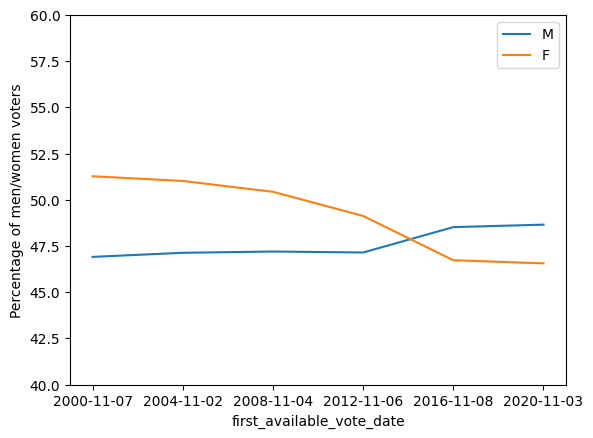

In [98]:
# Now plot the gender particiaption along the election dates
grouped = df_filtered.groupby('first_available_vote_date')['Voters_Gender'].value_counts().unstack()

print(grouped)


# plot the male portion divided by total voters
grouped['M'] = (grouped['M'] / total_available_voters) * 100
grouped["F"] = (grouped["F"] / total_available_voters) * 100
# grouped['F'] = grouped['F'] / total_available_voters
grouped["M"].plot(kind='line')
grouped["F"].plot(kind='line')

plt.ylabel('Percentage of men/women voters')
plt.ylim(40, 60)
# show color 
plt.legend()
plt.show()

EthnicGroups_EthnicGroup1Desc  East and South Asian  European  \
first_available_vote_date                                       
2000-11-07                                     6754    327012   
2004-11-02                                     6883    320385   
2008-11-04                                     7195    323076   
2012-11-06                                     7114    311972   
2016-11-08                                     8264    300885   
2020-11-03                                     7983    252961   

EthnicGroups_EthnicGroup1Desc  Hispanic and Portuguese  \
first_available_vote_date                                
2000-11-07                                       13710   
2004-11-02                                       13397   
2008-11-04                                       14339   
2012-11-06                                       14913   
2016-11-08                                       15399   
2020-11-03                                       13156   

EthnicGroups_E

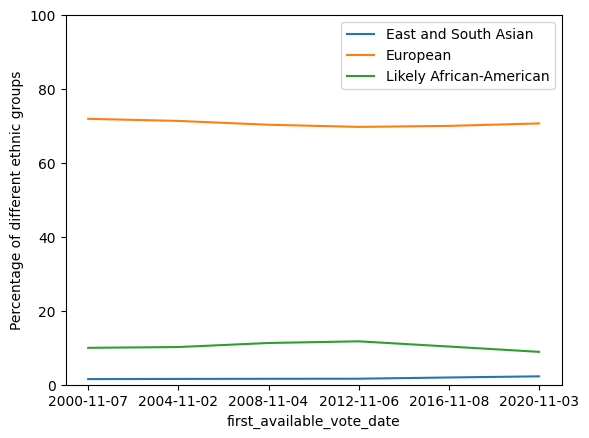

In [103]:
grouped_nationality = df_filtered.groupby('first_available_vote_date')['EthnicGroups_EthnicGroup1Desc'].value_counts().unstack()

print(grouped_nationality)

grouped_nationality["East and South Asian"] = (grouped_nationality["East and South Asian"] / total_available_voters) * 100
grouped_nationality["European"] = (grouped_nationality["European"] / total_available_voters) * 100
grouped_nationality["Likely African-American"] = (grouped_nationality["Likely African-American"] / total_available_voters) * 100

grouped_nationality["East and South Asian"].plot(kind='line')
grouped_nationality["European"].plot(kind='line')
grouped_nationality["Likely African-American"].plot(kind='line')

plt.ylabel('Percentage of different ethnic groups')
plt.ylim(0, 100)
plt.legend()


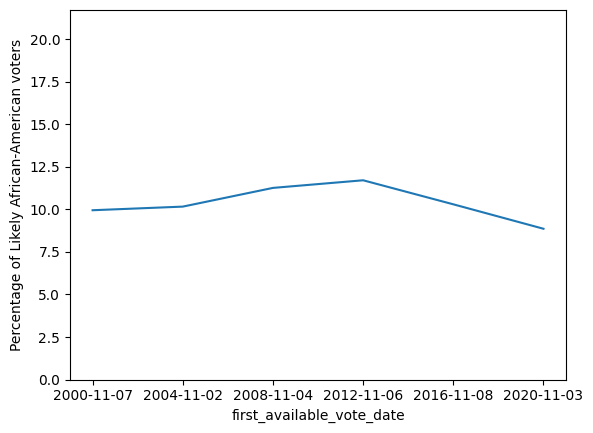

In [106]:
grouped_nationality["Likely African-American"].plot(kind='line')
plt.ylabel('Percentage of Likely African-American voters')
min = grouped_nationality["Likely African-American"].min()
max = grouped_nationality["Likely African-American"].max() + 10
plt.ylim(0, max)
plt.show()


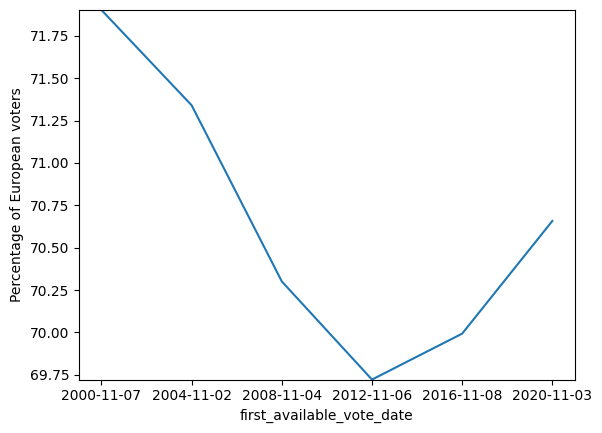

In [108]:
grouped_nationality["European"].plot(kind='line')
plt.ylabel('Percentage of European voters')
min = grouped_nationality["European"].min()
max = grouped_nationality["European"].max() 
plt.ylim(min, max)
plt.show()

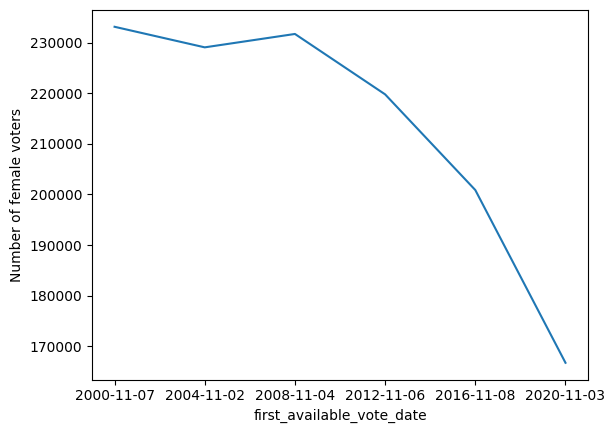

In [84]:
grouped["F"].plot(kind='line')
plt.ylabel('Number of female voters')
plt.show()

In [112]:
hhparties = df_filtered["Residence_HHParties_Description"].unique()
print(hhparties)
mixed_hhparties = [i for i in hhparties if i != 'Democratic' and i != 'Republican' and i != 'Independent']


['Democratic' 'Independent' 'Republican' 'Republican & Independent'
 'Democratic & Independent' 'Democratic & Republican'
 'Democratic & Republican & Independent']


Residence_HHParties_Description  Democratic  Democratic & Independent  \
first_available_vote_date                                               
2000-11-07                           107674                     52150   
2004-11-02                           109204                     50986   
2008-11-04                           114974                     53833   
2012-11-06                           101287                     52270   
2016-11-08                            82054                     52023   
2020-11-03                            50836                     50975   

Residence_HHParties_Description  Democratic & Republican  \
first_available_vote_date                                  
2000-11-07                                         22317   
2004-11-02                                         21844   
2008-11-04                                         20381   
2012-11-06                                         14819   
2016-11-08                                         1245

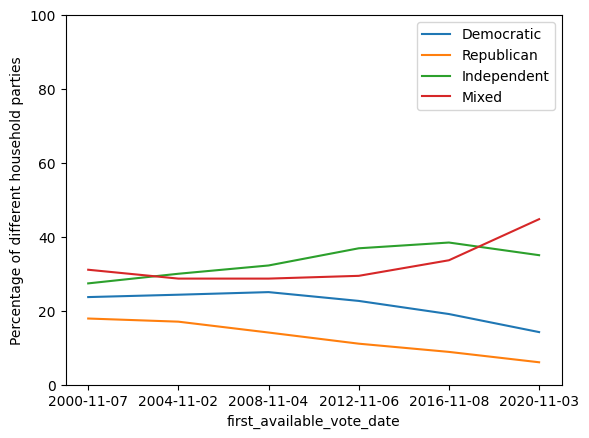

In [113]:
#
grouped_household = df_filtered.groupby('first_available_vote_date')['Residence_HHParties_Description'].value_counts().unstack()

print(grouped_household)

grouped_household["Democratic"] = (grouped_household["Democratic"] / total_available_voters) * 100
grouped_household["Republican"] = (grouped_household["Republican"] / total_available_voters) * 100
grouped_household["Independent"] = (grouped_household["Independent"] / total_available_voters) * 100
grouped_household["Mixed"] = (grouped_household["Republican & Independent"] \
    + grouped_household["Democratic & Independent"]\
        + grouped_household["Democratic & Republican"] \
            + grouped_household["Democratic & Republican & Independent"]
            ) / total_available_voters * 100

grouped_household["Democratic"].plot(kind='line')
grouped_household["Republican"].plot(kind='line')
grouped_household["Independent"].plot(kind='line')
grouped_household["Mixed"].plot(kind='line')

plt.ylabel('Percentage of different household parties')
plt.ylim(0, 100)
plt.legend()
plt.show()

['Voters_Gender_M', 'Voters_Gender_Not Known']


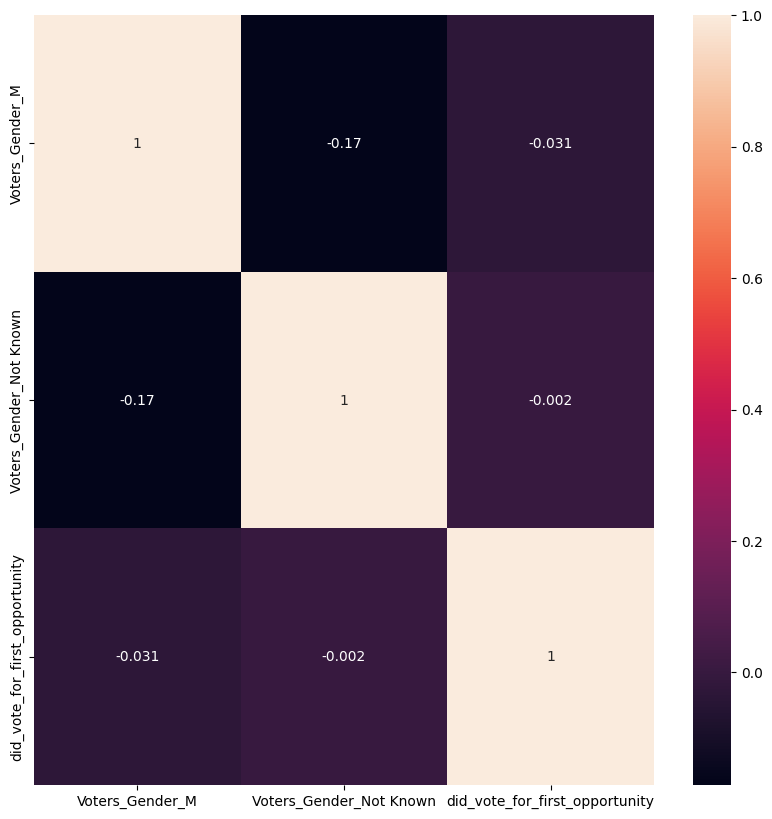

['EthnicGroups_EthnicGroup1Desc_European', 'EthnicGroups_EthnicGroup1Desc_Hispanic and Portuguese', 'EthnicGroups_EthnicGroup1Desc_Likely African-American', 'EthnicGroups_EthnicGroup1Desc_Not Known', 'EthnicGroups_EthnicGroup1Desc_Other']


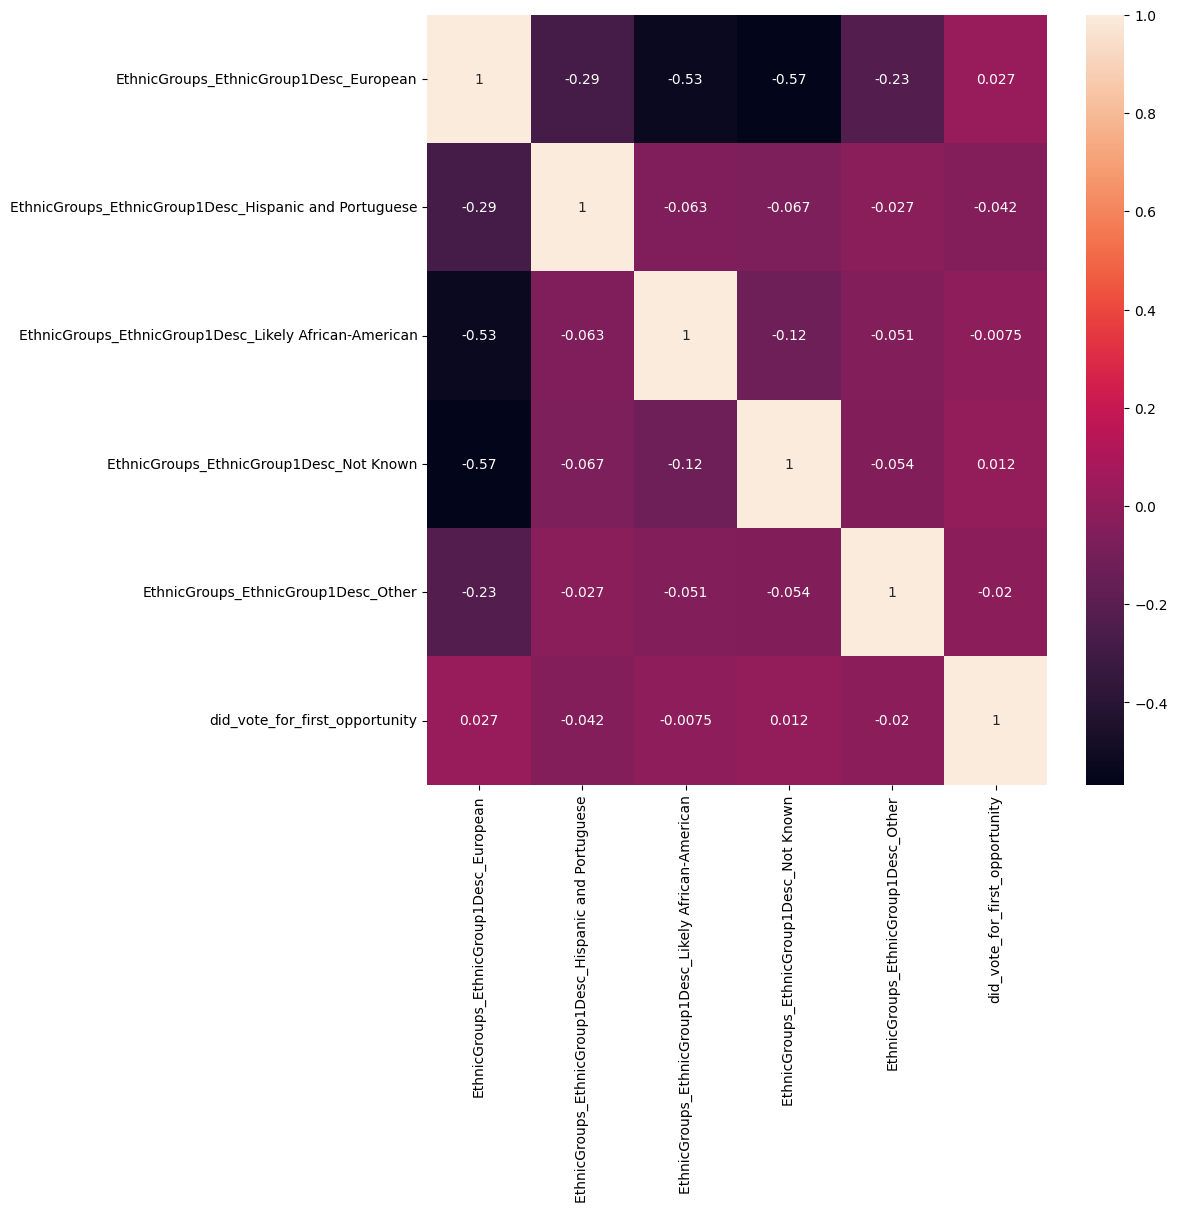

['ConsumerData_Language_Code_Chinese', 'ConsumerData_Language_Code_English', 'ConsumerData_Language_Code_German', 'ConsumerData_Language_Code_Hebrew', 'ConsumerData_Language_Code_Hindi', 'ConsumerData_Language_Code_Hungarian', 'ConsumerData_Language_Code_Italian', 'ConsumerData_Language_Code_Not Known', 'ConsumerData_Language_Code_Others', 'ConsumerData_Language_Code_Portuguese', 'ConsumerData_Language_Code_Russian', 'ConsumerData_Language_Code_Spanish', 'ConsumerData_Language_Code_Vietnamese']


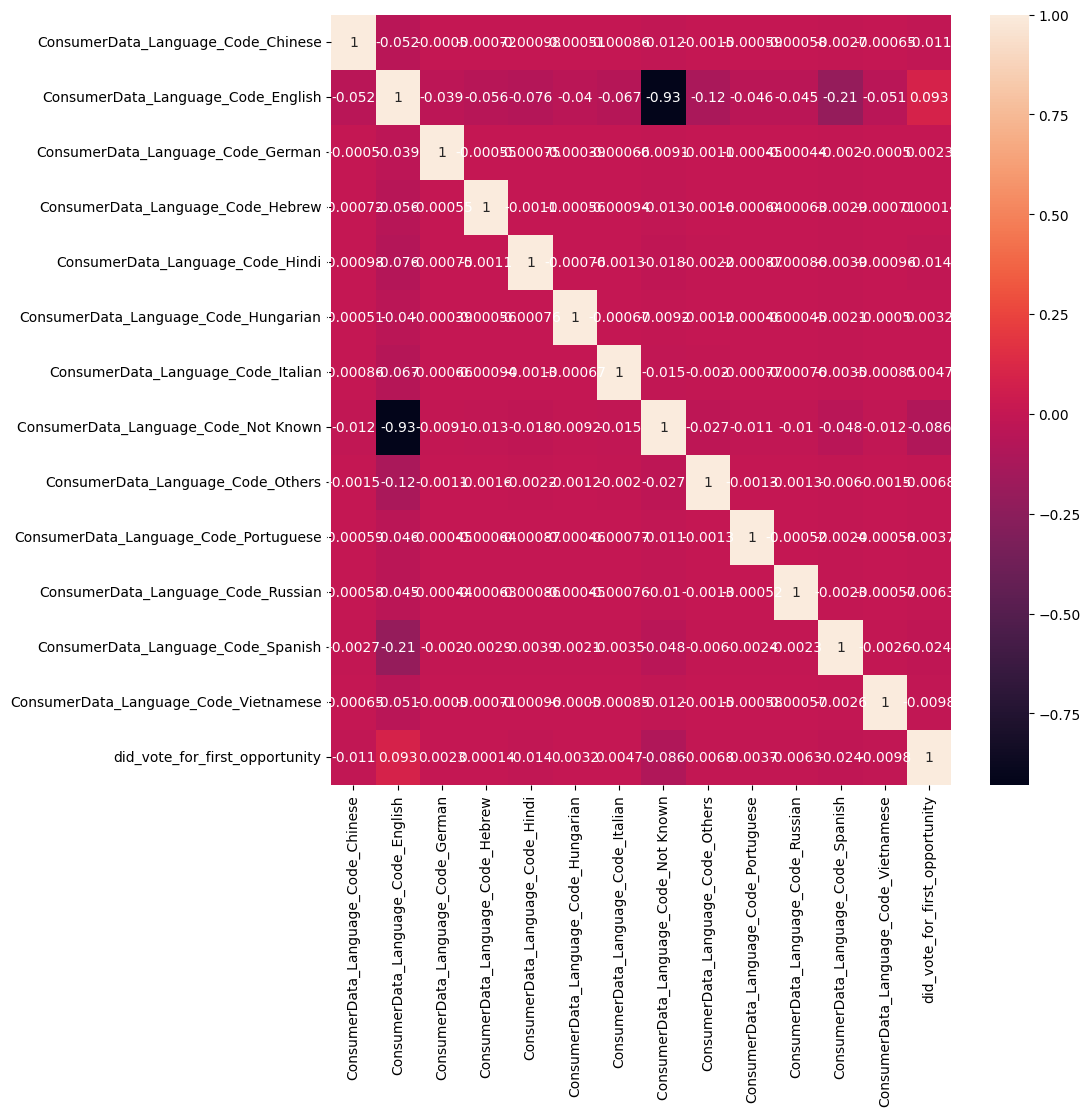

['Parties_Description_Democratic', 'Parties_Description_Green', 'Parties_Description_Libertarian', 'Parties_Description_Natural Law', 'Parties_Description_Non-Partisan', 'Parties_Description_Republican', 'Parties_Description_Socialist']


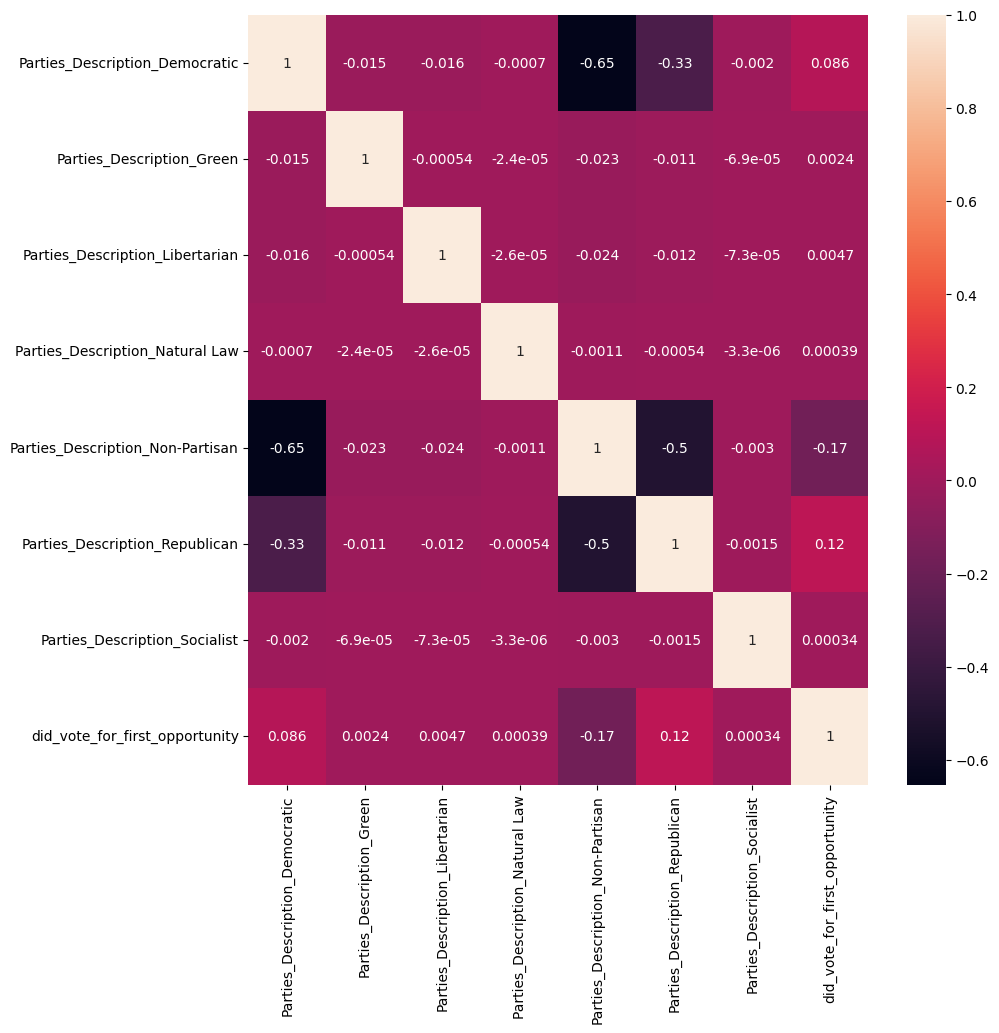

['ConsumerData_Religion_Code_Catholic', 'ConsumerData_Religion_Code_Eastern Orthodox', 'ConsumerData_Religion_Code_Greek Orthodox', 'ConsumerData_Religion_Code_Hindu', 'ConsumerData_Religion_Code_Islamic', 'ConsumerData_Religion_Code_Jewish', 'ConsumerData_Religion_Code_Lutheran', 'ConsumerData_Religion_Code_Mormon', 'ConsumerData_Religion_Code_Not Known', 'ConsumerData_Religion_Code_Protestant', 'ConsumerData_Religion_Code_Shinto', 'ConsumerData_Religion_Code_Siku']


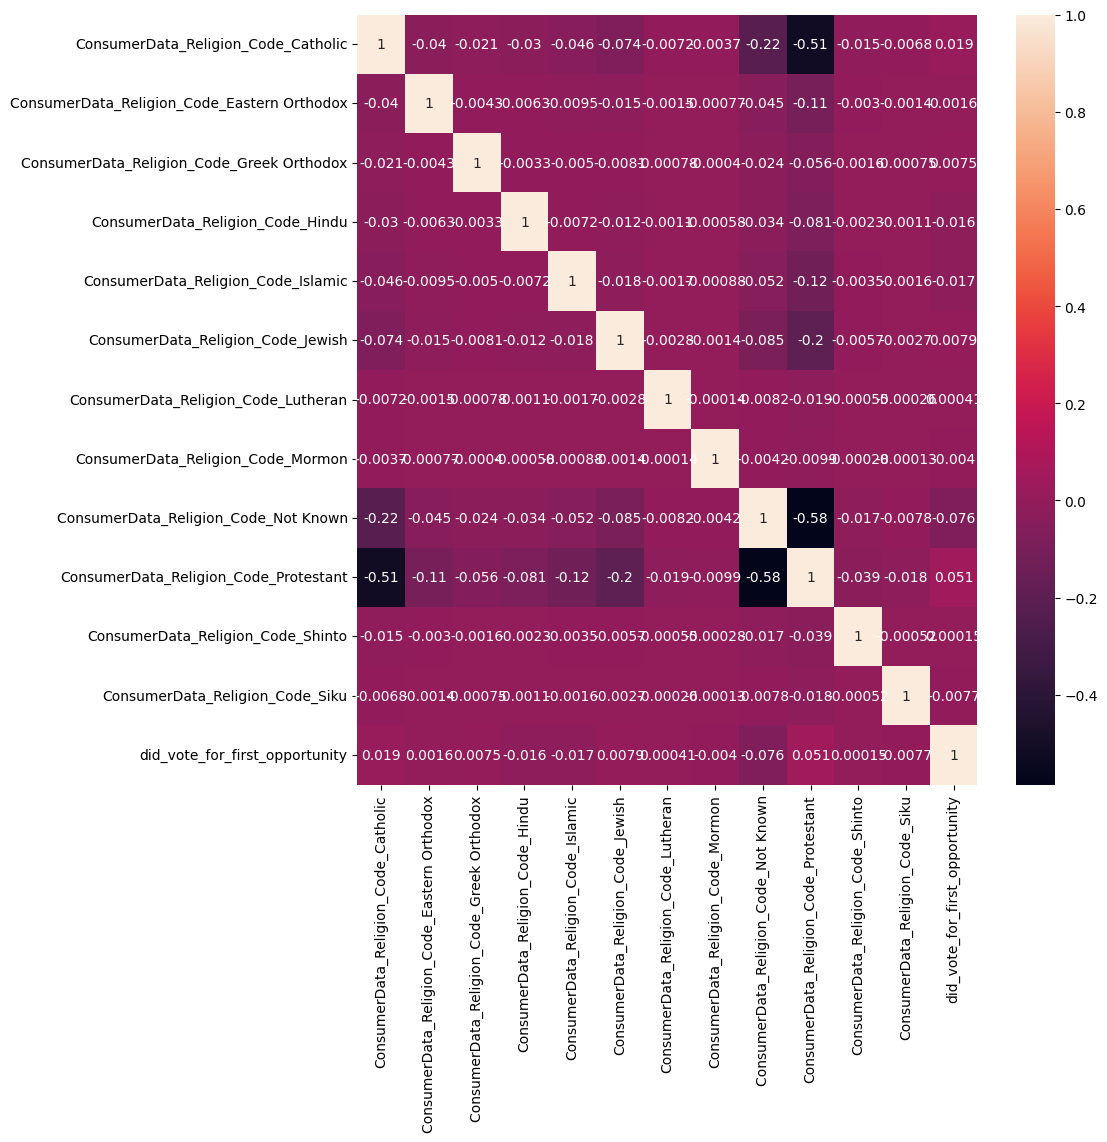

['Residence_HHParties_Description_Democratic & Independent', 'Residence_HHParties_Description_Democratic & Republican', 'Residence_HHParties_Description_Democratic & Republican & Independent', 'Residence_HHParties_Description_Independent', 'Residence_HHParties_Description_Republican', 'Residence_HHParties_Description_Republican & Independent']


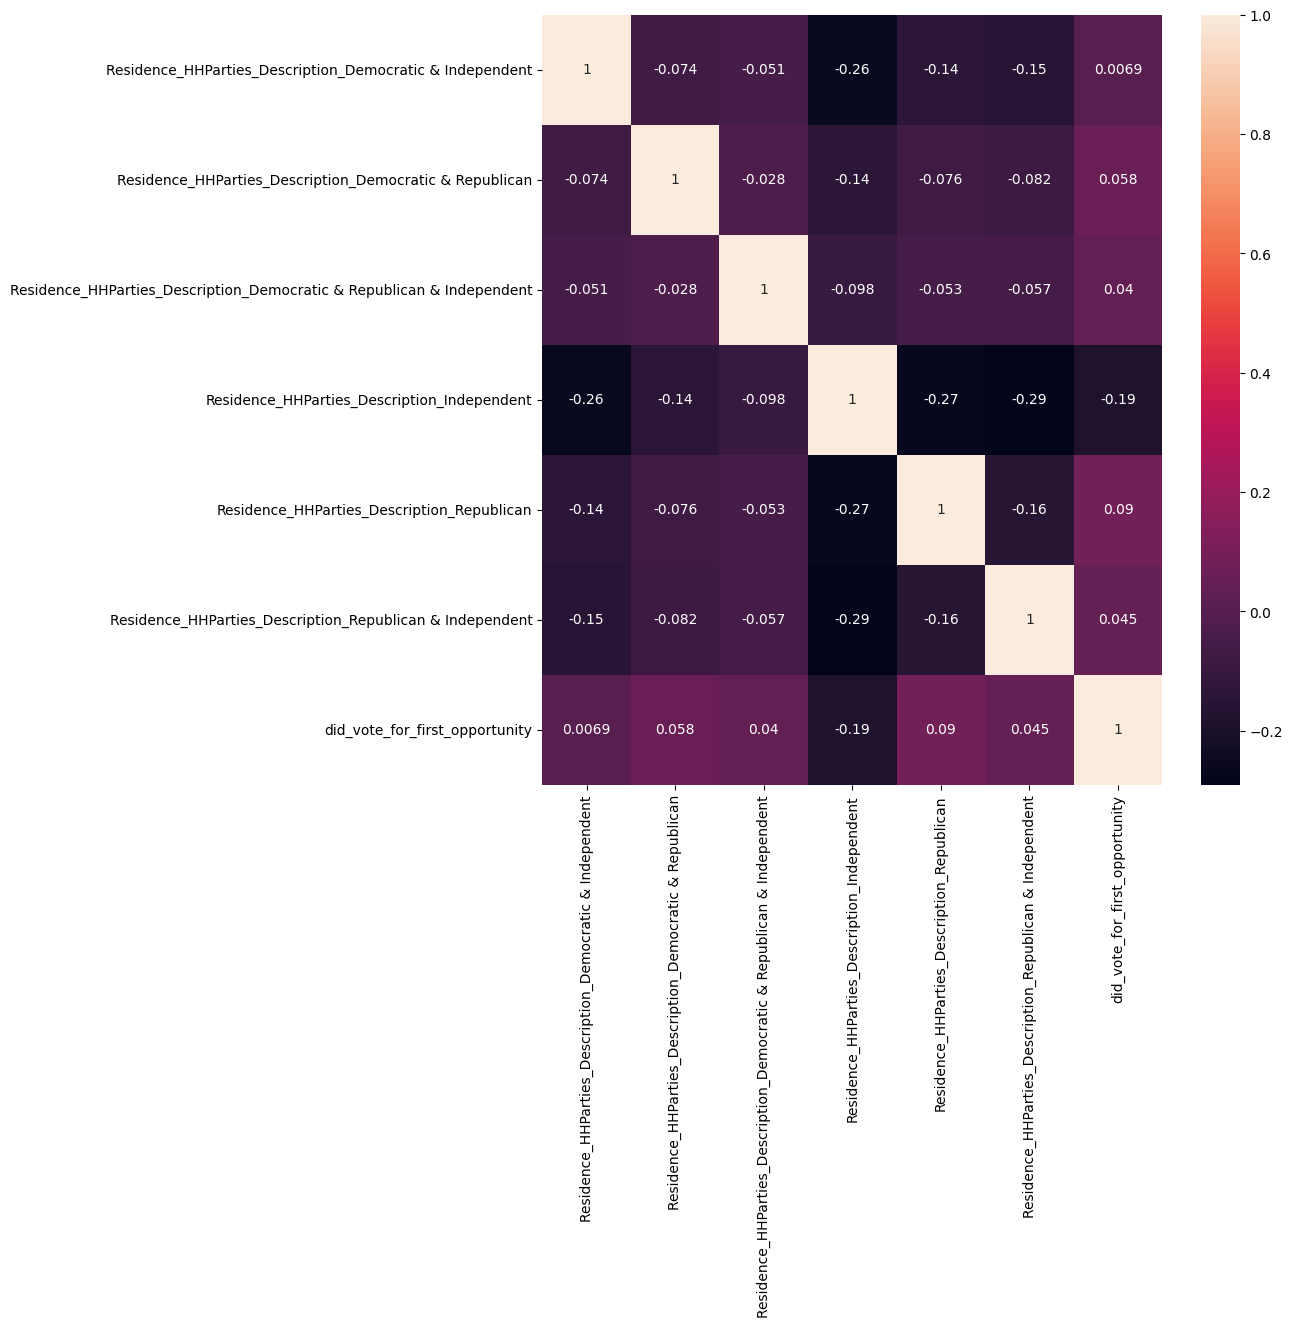

In [82]:
# use seaborn to first check the correlation between the columns
import seaborn as sns

# let us check each sns plot for each column
for col in note_worthy_categorical_columns:
    related_columns = [i for i in df_one_hot.columns if i.startswith(col)]
    print(related_columns)
    partial_df = df_one_hot[related_columns + [y_name]]
    corr = partial_df.corr()
    plt.figure(figsize=(10, 10))
    sns.heatmap(corr, annot=True)
    plt.show()

In [83]:
df_one_hot.head()
# df_one_hot[y_name] = df_one_hot[y_name].apply(lambda x: True if x == 'Y' else False)

,did_vote_for_first_opportunity,Voters_Gender_M,Voters_Gender_Not Known,EthnicGroups_EthnicGroup1Desc_European,EthnicGroups_EthnicGroup1Desc_Hispanic and Portuguese,EthnicGroups_EthnicGroup1Desc_Likely African-American,EthnicGroups_EthnicGroup1Desc_Not Known,EthnicGroups_EthnicGroup1Desc_Other,ConsumerData_Language_Code_Chinese,ConsumerData_Language_Code_English,ConsumerData_Language_Code_German,ConsumerData_Language_Code_Hebrew,ConsumerData_Language_Code_Hindi,ConsumerData_Language_Code_Hungarian,ConsumerData_Language_Code_Italian,ConsumerData_Language_Code_Not Known,ConsumerData_Language_Code_Others,ConsumerData_Language_Code_Portuguese,ConsumerData_Language_Code_Russian,ConsumerData_Language_Code_Spanish,ConsumerData_Language_Code_Vietnamese,Parties_Description_Democratic,Parties_Description_Green,Parties_Description_Libertarian,Parties_Description_Natural Law,Parties_Description_Non-Partisan,Parties_Description_Republican,Parties_Description_Socialist,ConsumerData_Religion_Code_Catholic,ConsumerData_Religion_Code_Eastern Orthodox,ConsumerData_Religion_Code_Greek Orthodox,ConsumerData_Religion_Code_Hindu,ConsumerData_Religion_Code_Islamic,ConsumerData_Religion_Code_Jewish,ConsumerData_Religion_Code_Lutheran,ConsumerData_Religion_Code_Mormon,ConsumerData_Religion_Code_Not Known,ConsumerData_Religion_Code_Protestant,ConsumerData_Religion_Code_Shinto,ConsumerData_Religion_Code_Siku,Residence_HHParties_Description_Democratic & Independent,Residence_HHParties_Description_Democratic & Republican,Residence_HHParties_Description_Democratic & Republican & Independent,Residence_HHParties_Description_Independent,Residence_HHParties_Description_Republican,Residence_HHParties_Description_Republican & Independent
0,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
1,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False
2,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False
3,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
4,True,False,True,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# now let us create the logistic regression model but with lasso regularization
X = df_one_hot.drop(y_name, axis=1)
y = df_one_hot[y_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create the Logistic Regression model with L1 regularization
# Note: Use solver='liblinear' or 'saga' which support L1 penalty
model = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

       False       0.62      0.59      0.60    267267
        True       0.59      0.61      0.60    252433

    accuracy                           0.60    519700
   macro avg       0.60      0.60      0.60    519700
weighted avg       0.60      0.60      0.60    519700

Confusion Matrix:
[[157897 109370]
 [ 97604 154829]]


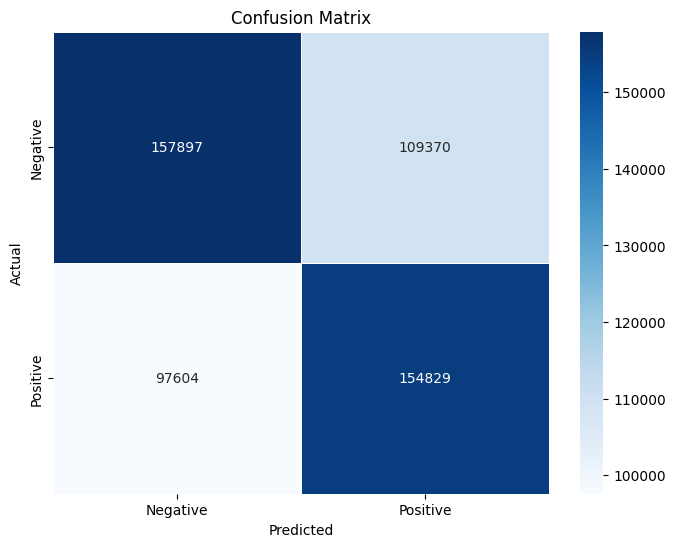

In [85]:

# Define class names
class_names = ['Negative', 'Positive']  # Replace with your actual class names

# Plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, class_names, normalize=False, title='Confusion Matrix'):
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_df = pd.DataFrame(cm, index=class_names, columns=class_names)
    plt.figure(figsize=(8,6))
    sns.heatmap(cm_df, annot=True, fmt='.2f' if normalize else 'd', cmap='Blues', linewidths=0.5)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

plot_confusion_matrix(y_test, y_pred, class_names, normalize=False, title='Confusion Matrix')

In [87]:
# Get the coefficients
coefficients = model.coef_[0]

# Create a DataFrame to view feature importance
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Display non-zero coefficients
# print the count of non zero coefficients
print("There are", feature_importance[feature_importance['Coefficient'] != 0].shape[0], "non-zero coefficients")
print(feature_importance[feature_importance['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False))

There are 41 non-zero coefficients
                                              Feature  Coefficient
41  Residence_HHParties_Description_Democratic & R...     0.496523
13                 ConsumerData_Language_Code_Italian     0.420583
12               ConsumerData_Language_Code_Hungarian     0.418091
9                   ConsumerData_Language_Code_German     0.323440
22                    Parties_Description_Libertarian     0.315299
5             EthnicGroups_EthnicGroup1Desc_Not Known     0.285820
40  Residence_HHParties_Description_Democratic & R...     0.265969
29          ConsumerData_Religion_Code_Greek Orthodox     0.243888
33                ConsumerData_Religion_Code_Lutheran     0.241619
8                  ConsumerData_Language_Code_English     0.209999
43         Residence_HHParties_Description_Republican     0.208472
44  Residence_HHParties_Description_Republican & I...     0.164120
21                          Parties_Description_Green     0.154092
2              EthnicGroups